# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Gian Luky Saputra
- **Email:** gian.luky3102@mail.ugm.ac.id
- **ID Dicoding:** gianls7

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana tren jumlah peminjaman sepeda harian?
- Pertanyaan 2: Bagaimana rata-rata peminjaman sepeda harian berdasarkan musimnya?
- Pertanyaan 3: Bagaimana rata-rata peminjaman sepeda harian berdasarkan waktunya?
- Pertanyaan 4 (**Analisis Lanjutan**): Bagaimana Pengaruh cuaca terhadap jumlah peminjaman harian?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data
Data diambil dari github yang telah saya upload

In [2]:
day0 = pd.read_csv("https://raw.githubusercontent.com/Lucky77777777/Bike-Sharing/main/Dataset/day.csv")
hour0 = pd.read_csv("https://raw.githubusercontent.com/Lucky77777777/Bike-Sharing/main/Dataset/hour.csv")
display(day0.head(), hour0.head(), day0.shape, hour0.shape)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


(731, 16)

(17379, 17)

### Assessing Data
> **Pengecekan Tiap Variabel**<br>
Variabel dteday menunjukan tanggal peminjaman, maka format datanya kurang tepat, sehingga akan diubah dari tipe object --> date

In [3]:
display(day0.info(), hour0.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

None

None

> **Pengecekan Missing Values** <br>
Tidak terdapat missing-values

In [4]:
display(day0.isna().sum(), hour0.isna().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

> **Pengecekan Duplikasi Data** <br>
Tidak terdapat data yang terduplikat

In [5]:
display(day0.duplicated().sum(), hour0.duplicated().sum())

0

0

> **Ringkasan Data (Statistika Deskriptif)** <br>
Semua variabel cenderung memiliki nilai yang logis secara satuan dan range<br>
Sedikit yang perlu diperhatikan, variabel temp, atemp, hum, dan windspeed nilainya telah dinormalisasi


In [6]:
display(day0.describe(include = 'all'),
        hour0.describe(include = 'all'))

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


#### Rangkuman
| Table       | Tipe data                                       | Missing value                               | Duplicate data                              | Inaccurate value                          |
|-------------|-------------------------------------------------|---------------------------------------------|--------------------------------------------|-------------------------------------------|
| day0 |Terdapat kesalahan tipe data untuk kolom dteday|-|-|-|
| hour0 | Terdapat kesalahan tipe data untuk kolom dteday |-| - | - |


### Cleaning Data

> **Pemilihan Variabel** <br>
Buang variabel yang tidak diperlukan selama visualisasi, karena akan berfokus pada variabel yang berguna untuk menjawab pertanyaan saja<br>
Pada dataset **day** variabel dibuang mencakup:<br>
* yr
* mnth
* atemp
* holiday
* weekday
* workingday
<br>

> Pada dataset **hour** hanya menggunakan variabel berikut:<br>
* dteday
* hr
* cnt


In [7]:
drop_day = ["yr", "mnth", "holiday", "weekday", "workingday", "atemp"]
day1 = day0.drop(drop_day, axis = 1)

still_hour = ['dteday', 'hr', 'cnt']
hour1 = hour0[still_hour]

display(day1.head(), hour1.head())

,instant,dteday,season,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,2,0.344167,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,2,0.363478,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,1,0.226957,0.436957,0.186900,82,1518,1600


,dteday,hr,cnt
0,2011-01-01,0,16
1,2011-01-01,1,40
2,2011-01-01,2,32
3,2011-01-01,3,13
4,2011-01-01,4,1


> **Ubah Tipe Data Variabel dteday**

In [8]:
day1['dteday'] = pd.to_datetime(day1['dteday'])
hour1['dteday'] = pd.to_datetime(hour1['dteday'])
display(day1.info(), hour1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   weathersit  731 non-null    int64         
 4   temp        731 non-null    float64       
 5   hum         731 non-null    float64       
 6   windspeed   731 non-null    float64       
 7   casual      731 non-null    int64         
 8   registered  731 non-null    int64         
 9   cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(6)
memory usage: 57.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   dteday  17379 non-null  datetime64[ns]
 1   hr  

<ipython-input-8-cb1e4929634b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hour1['dteday'] = pd.to_datetime(hour1['dteday'])


None

None

> **Ubah Skala**<br>
Beberapa variabel yang dinormalisasi (temp, hum, dan windspeed), nilainya akan dikembalikan ke nilai asli agar lebih mudah diinterpretasi pada saat visualisasi
* variabel temp satuannya derajat celcius
* variabel hum satuannya %
* variabel windspeed satuannya km/h

In [9]:
# Mengembalikan nilai 'temp' ke nilai aslinya
day1['temp'] = day1['temp'] * 41

# Mengembalikan nilai 'hum' ke nilai aslinya
day1['hum'] = day1['hum'] * 100

# Mengembalikan nilai 'windspeed' ke nilai aslinya
day1['windspeed'] = day1['windspeed'] * 67

display(day1.head(), day1.describe())

,instant,dteday,season,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,2,14.110847,80.5833,10.749882,331,654,985
1,2,2011-01-02,1,2,14.902598,69.6087,16.652113,131,670,801
2,3,2011-01-03,1,1,8.050924,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,1,1,8.200000,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,1,1,9.305237,43.6957,12.522300,82,1518,1600


,instant,season,weathersit,temp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,1.395349,20.310776,62.789406,12.762576,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.544894,7.505091,14.242910,5.192357,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,1.000000,2.424346,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2.000000,1.000000,13.820424,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,20.431653,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,2.000000,26.872076,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,3.000000,35.328347,97.250000,34.000021,3410.000000,6946.000000,8714.000000


> **Variabel Baru: time_of_day**<br>
Menunjukan 'Morning', 'Afternoon', 'Evening', 'Night' berdasarkan kelompok jamnya<br>
referensi: [https://www.britannica.com/dictionary/eb/qa/parts-of-the-day-early-morning-late-morning-etc](https://www.britannica.com/dictionary/eb/qa/parts-of-the-day-early-morning-late-morning-etc)

In [10]:
bins = [0, 5, 12, 17, 21, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening', 'Night']

# Menambahkan kolom baru 'time_of_day' yang berisi kategori berdasarkan 'hr'
hour1['time_of_day'] = pd.cut(hour1['hr'], bins=bins, labels=labels, right=False, ordered=False)
hour1.head(24)

<ipython-input-10-88bee50993eb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hour1['time_of_day'] = pd.cut(hour1['hr'], bins=bins, labels=labels, right=False, ordered=False)


,dteday,hr,cnt,time_of_day
0,2011-01-01,0,16,Night
1,2011-01-01,1,40,Night
2,2011-01-01,2,32,Night
3,2011-01-01,3,13,Night
4,2011-01-01,4,1,Night
5,2011-01-01,5,1,Morning
6,2011-01-01,6,2,Morning
7,2011-01-01,7,3,Morning
8,2011-01-01,8,8,Morning
9,2011-01-01,9,14,Morning


## Exploratory Data Analysis (EDA)
Pembuatan fungsi menyesuaikan dataframe sesuai periode waktu yang diinginkan

In [11]:
def f_date(df, start_date, end_date):
  return df[(df["dteday"] >= str(start_date)) & (df["dteday"] <= str(end_date))]

f_date(day1, '2011-01-03', '2011-01-07')

,instant,dteday,season,weathersit,temp,hum,windspeed,casual,registered,cnt
2,3,2011-01-03,1,1,8.050924,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,1,1,8.200000,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,1,1,9.305237,43.6957,12.522300,82,1518,1600
5,6,2011-01-06,1,1,8.378268,51.8261,6.000868,88,1518,1606
6,7,2011-01-07,1,2,8.057402,49.8696,11.304642,148,1362,1510


> ##### **Komparansi Jumlah Pinjaman berdasarkan status keanggotaan**<br>
Menggunakan periode keseluruhan (tahun 2011 dan 2012) diperoleh bahwa jumlah peminjam sepeda didominasi oleh peminjaman yang sudah registered

In [12]:
print(day0.casual.sum())
print(day0.registered.sum())

620017
2672662


> ##### **Karakteristik hari pada saat jumlah peminjaman tertinggi dan terendah** <br>
**Jumlah peminjaman tertinggi** terjadi pada 15 September 2012, mencapai angka 8714 peminjaman (3160 casual & 5554 registered), dengan karakteristik hari
* Terjadi pada musim gugur (3: fall)
* Kondisi cuaca: Clear, Few clouds, Partly cloudy, Partly cloudy
* Suhu 24.94 derajat celcius, kelembapan 50.17%, dan kecepatan angin 16.58 km/h
<br>

> **Jumlah peminjaman terendah** terjadi pada 29 Oktober 2012, mencapai angka 22 peminjaman (2 casual & 20 registered), dengan karakteristik hari
* Terjadi pada musim dingin (4: winter)
* Kondisi cuaca: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
* Suhu 18.04 derajat celcius, kelembapan 88.0%, dan kecepatan angin 24.00 km/h





In [13]:
day1.loc[day1['cnt'].idxmax()]

instant                       624
dteday        2012-09-15 00:00:00
season                          3
weathersit                      1
temp                    24.941653
hum                       50.1667
windspeed               16.583907
casual                       3160
registered                   5554
cnt                          8714
Name: 623, dtype: object

In [14]:
day1.loc[day1['cnt'].idxmin()]

instant                       668
dteday        2012-10-29 00:00:00
season                          4
weathersit                      3
temp                        18.04
hum                          88.0
windspeed                 23.9994
casual                          2
registered                     20
cnt                            22
Name: 667, dtype: object

> ##### **Rata-Rata Jumlah Pinjaman Berdasarkan Musimnya**<br>
Berdasarkan keseluruhan periode (tahun 2011 & 2012), jumlah peminjaman sepeda harian tertinggi cenderung terjadi di musim gugur (Fall), terendah terjadi pada musim semi (Springer)


In [15]:
def f_season_cnt(df):
  return df.groupby(by="season").agg({
      "cnt": "mean"
  }).sort_values(by="cnt", ascending = False).reset_index()

season_cnt = f_season_cnt(day1)
season_cnt['cnt'] = round(season_cnt['cnt'])
season_cnt['season'] = season_cnt.season.replace({1: "Springer", 2: "Summer", 3: "Fall", 4: "Winter"})
season_cnt

,season,cnt
0,Fall,5644.0
1,Summer,4992.0
2,Winter,4728.0
3,Springer,2604.0


> ##### **Rata-Rata Jumlah Pinjaman Berdasarkan Waktunya (Bagian Hari)** <br>
Aktivitas peminjaman sepeda tiap harinya cenderung didominasi pada saat evening, dan sepi pada saat night


In [16]:
def f_time_cnt(df):
  return df.groupby(by="time_of_day").agg({
      "cnt": "mean"
  }).sort_values(by="cnt", ascending = False).reset_index()

time_cnt = f_time_cnt(hour1)
time_cnt['cnt'] = round(time_cnt['cnt'])
time_cnt

,time_of_day,cnt
0,Evening,356.0
1,Afternoon,262.0
2,Morning,182.0
3,Night,66.0


> ##### **Korelasi Kondisi Cuaca dengan Jumlah Pinjaman Harian**<br>
Faktor suhu (temp) memiliki hubungan cukup kuat yang positif dengan jumlah pinjaman sepeda harian. Sedangkan faktor humidity dan windspeed memiliki hubungan yang lemah dengan jumlah pinjaman sepeda harian

In [17]:
day1[["temp", "hum", "windspeed", "cnt"]].corr()

,temp,hum,windspeed,cnt
temp,1.000000,0.126963,-0.157944,0.627494
hum,0.126963,1.000000,-0.248489,-0.100659
windspeed,-0.157944,-0.248489,1.000000,-0.234545
cnt,0.627494,-0.100659,-0.234545,1.000000


> **Data Final Buat Visualisasi**

In [18]:
def f_time_agg(df):
  return df.groupby(by=['dteday', "time_of_day"]).agg({
      "cnt": "sum"
  }).reset_index()

df_hour = f_time_agg(hour1)
df_day = day1.copy()

display(df_day, df_hour)

# df_day.to_csv("df_day.csv", index=False)
# df_hour.to_csv("df_hour.csv", index=False)

,instant,dteday,season,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,2,14.110847,80.5833,10.749882,331,654,985
1,2,2011-01-02,1,2,14.902598,69.6087,16.652113,131,670,801
2,3,2011-01-03,1,1,8.050924,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,1,1,8.200000,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,1,1,9.305237,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,2,10.420847,65.2917,23.458911,247,1867,2114
727,728,2012-12-28,1,2,10.386653,59.0000,10.416557,644,2451,3095
728,729,2012-12-29,1,2,10.386653,75.2917,8.333661,159,1182,1341
729,730,2012-12-30,1,1,10.489153,48.3333,23.500518,364,1432,1796


,dteday,time_of_day,cnt
0,2011-01-01,Afternoon,487
1,2011-01-01,Evening,175
2,2011-01-01,Morning,120
3,2011-01-01,Night,203
4,2011-01-02,Afternoon,377
...,...,...,...
2919,2012-12-30,Night,242
2920,2012-12-31,Afternoon,1203
2921,2012-12-31,Evening,494
2922,2012-12-31,Morning,764


## Visualization & Explanatory Analysis


### Pertanyaan 1: Bagaimana tren jumlah peminjaman sepeda harian?<br>
* Secara keseluruhan, terjadi kenaikan jumlah peminjaman sepeda tahun 2012 dibandingkan dengan tahun 2011
* Kebanyakan peminjam telah berstatus registered
* Jumlah peminjaman sepeda tertinggi cenderung berkumpul pada bulan oktober 2012
* Jumlah peminjaman sepeda terendah cenderung terjadi pada awal dan akhir tahun

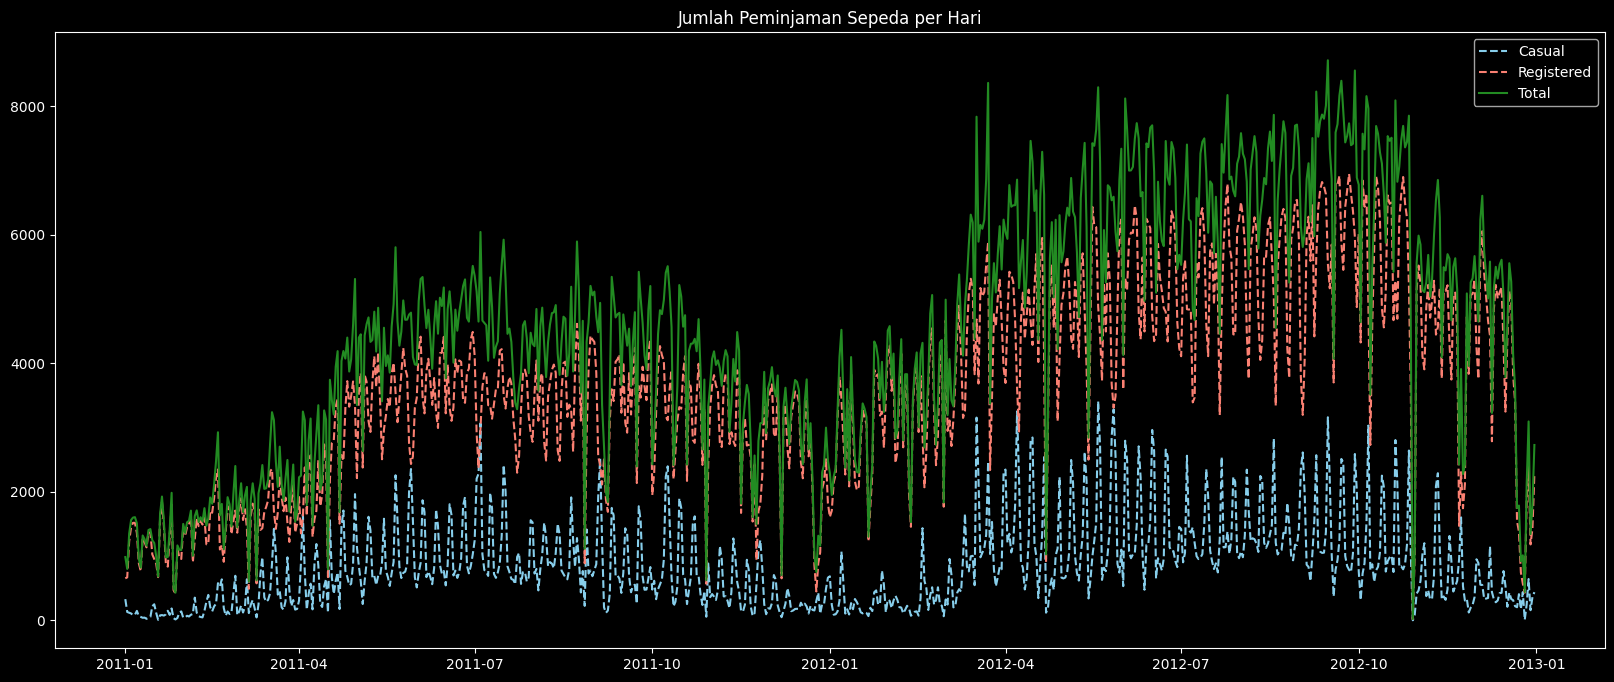

In [19]:
def plot_bike_rental(df):
    plt.style.use('dark_background')
    # Membuat gambar dan sumbu
    fig, ax = plt.subplots(figsize=(20, 8))

    # Menggambar garis putus-putus untuk kolom casual dan registered
    ax.plot(df['dteday'], df['casual'], linestyle='--', color='skyblue', label='Casual')
    ax.plot(df['dteday'], df['registered'], linestyle='--', color='salmon', label='Registered')

    # Menggambar garis penuh untuk kolom cnt
    ax.plot(df['dteday'], df['cnt'], linestyle='-', color='forestgreen', label='Total')

    # Menambahkan judul dan label sumbu
    ax.set_title('Jumlah Peminjaman Sepeda per Hari')

    # Menambahkan legend dan mengganti nama
    ax.legend(['Casual', 'Registered', 'Total'])

    # Menampilkan plot
    plt.show()

plot_bike_rental(df_day)
# plot_bike_rental(f_date(df_day, '2011-04-01', '2012-02-29'))

### Pertanyaan 2: Bagaimana rata-rata peminjaman sepeda harian berdasarkan musimnya?
Jumlah peminjaman sepeda harian tertinggi cenderung terjadi pada musim gugur, diikuti oleh musim panas dan musim dingin. Sedangkan musim semi cenderung lebih rendah dibandingkan periode musim lainnya.

In [20]:
season_cnt = f_season_cnt(df_day)
season_cnt['cnt'] = round(season_cnt['cnt'])
season_cnt['season'] = season_cnt.season.replace({1: "Springer", 2: "Summer", 3: "Fall", 4: "Winter"})
season_cnt

,season,cnt
0,Fall,5644.0
1,Summer,4992.0
2,Winter,4728.0
3,Springer,2604.0


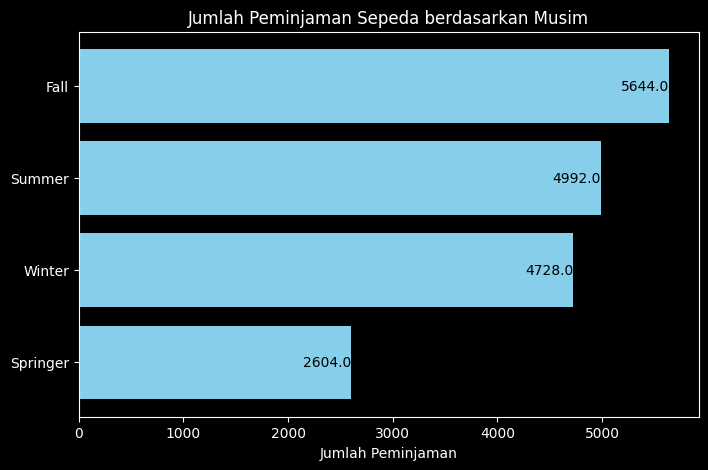

In [21]:
def plot_season_cnt(season_cnt):
    # Mengatur tema plot
    plt.style.use('dark_background')

    # Mengurutkan DataFrame berdasarkan nilai cnt (jumlah peminjaman)
    season_cnt_sorted = season_cnt.sort_values(by='cnt', ascending=True)

    # Membuat gambar dan sumbu
    fig, ax = plt.subplots(figsize=(8, 5))

    # Membuat barplot horizontal
    bars = ax.barh(season_cnt_sorted['season'], season_cnt_sorted['cnt'], color='skyblue')

    # Menambahkan label nilai di ujung tiap bar
    for bar in bars:
        ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
                round(bar.get_width(), 2),
                va='center', ha='right', fontsize=10, color='black')

    # Menambahkan judul dan label sumbu
    ax.set_title('Jumlah Peminjaman Sepeda berdasarkan Musim')
    ax.set_xlabel('Jumlah Peminjaman')

    # Menampilkan plot
    plt.show()

plot_season_cnt(season_cnt)

### Pertanyaan 3: Bagaimana rata-rata peminjaman sepeda berdasarkan waktu per-harinya?
Jumlah peminjaman sepeda berdasarkan waktunya dalam 1 hari tertinggi cenderung terjadi pada saat evening, diikuti oleh afternoon dan morning. Sedangkan saat night cenderung lebih rendah dibandingkan waktu lainnya dalam 1 hari

In [22]:
time_cnt = f_time_cnt(df_hour)
time_cnt['cnt'] = round(time_cnt['cnt'])
time_cnt

,time_of_day,cnt
0,Evening,1420.0
1,Afternoon,1308.0
2,Morning,1261.0
3,Night,516.0


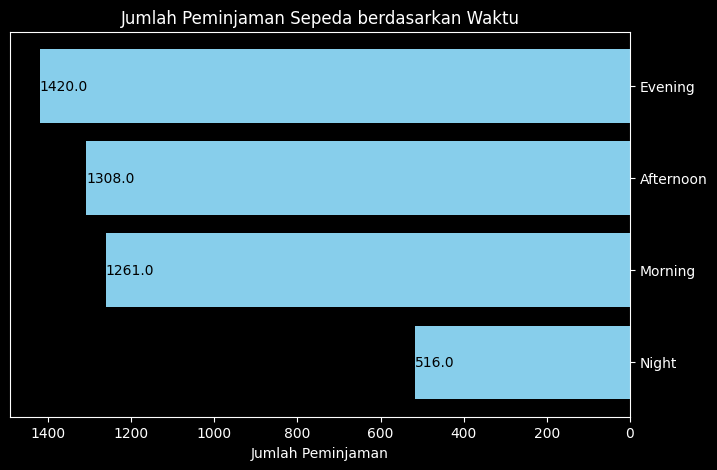

In [23]:
def plot_time_cnt(time_cnt):
    # Mengatur tema plot
    plt.style.use('dark_background')

    # Mengurutkan DataFrame berdasarkan nilai cnt (jumlah peminjaman)
    time_cnt_sorted = time_cnt.sort_values(by='cnt', ascending=True)

    # Membuat gambar dan sumbu
    fig, ax = plt.subplots(figsize=(8, 5))

    # Membuat barplot horizontal
    bars = ax.barh(time_cnt_sorted['time_of_day'], time_cnt_sorted['cnt'], color='skyblue')

    # Menambahkan label nilai di ujung tiap bar
    for bar in bars:
        ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
                round(bar.get_width(), 2),
                va='center', ha='left', fontsize=10, color='black')

    # Menambahkan judul dan label sumbu
    ax.set_title('Jumlah Peminjaman Sepeda berdasarkan Waktu')
    ax.set_xlabel('Jumlah Peminjaman')

    ax.invert_xaxis()
    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()

    # Menampilkan plot
    plt.show()

plot_time_cnt(time_cnt)

### Pertanyaan 4 (**Analisis Lanjutan**): Bagaimana Pengaruh cuaca terhadap jumlah pinjaman harian
* Berdasarkan heatmap, jumlah peminjaman sepeda harian memiliki hubungan cukup kuat yang positif dengan faktor suhu (temp). Dengan nilai korelasi sebesar +0.63.
* Sedangkan faktor kelembapan (hum) dan kecepatan angin (windspeed) memiliki hubungan yang lemah dengan jumlah peminjaman sepeda harian, masing-masing dengan nilai korelasi sebesar -0.10 dan -0.23

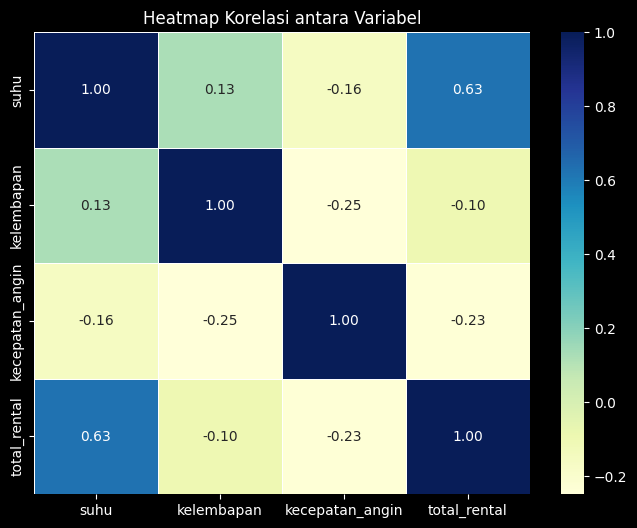

In [24]:
def plot_heatmap_corr(df):
    # Mengatur tema plot
    plt.style.use('dark_background')

    # Mengganti nama kolom cnt menjadi total_rental
    df = df.rename(columns={'cnt': 'total_rental', 'hum': "kelembapan", "windspeed": "kecepatan_angin", "temp": "suhu"})

    # Menghitung matriks korelasi
    corr_matrix = df.corr()

    # Membuat gambar
    plt.figure(figsize=(8, 6))

    # Membuat heatmap korelasi
    sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)

    # Menambahkan judul
    plt.title('Heatmap Korelasi antara Variabel')

    # Menampilkan plot
    plt.show()

plot_heatmap_corr(df_day[["temp", "hum", "windspeed", "cnt"]])

> Berikutnya disajikan hasil analisis regresi linear sederhana
* Menggunakan faktor suhu, diperoleh model regresi dengan parameter $\beta_0 = 1214.64$ dan $\beta_1 = 161.97$. Nilai $\beta_1$ yang positif menunjukkan bahwa peningkatan suhu cenderung meningkatkan jumlah peminjaman sepeda harian. Selain itu, diperoleh nilai $R^2$ sebesar 0.39, artinya 39% keragaman nilai jumlah peminjaman sepeda pada model dapat dijelaskan oleh faktor suhu.
* Menggunakan faktor kelembapan, diperoleh model regresi dengan parameter $\beta_0 = 5363.99$ dan $\beta_1 = -13.69$. Nilai $\beta_1$ yang negatif menunjukkan bahwa peningkatan kelembapan cenderung menurunkan jumlah peminjaman sepeda harian. Selain itu, diperoleh nilai $R^2$ sebesar 0.01, artinya hanya 1% keragaman nilai jumlah peminjaman sepeda pada model dapat dijelaskan oleh faktor kelembapan.
* Menggunakan faktor kecepatan angin, diperoleh model regresi dengan parameter $\beta_0 = 5621.15$ dan $\beta_1 = -87.51$. Nilai $\beta_1$ yang negatif menunjukkan bahwa peningkatan kecepatan angin cenderung menurunkan jumlah peminjaman sepeda harian. Selain itu, diperoleh nilai $R^2$ sebesar 0.06, artinya hanya 6% keragaman nilai jumlah peminjaman sepeda pada model dapat dijelaskan oleh faktor kecepatan angin.


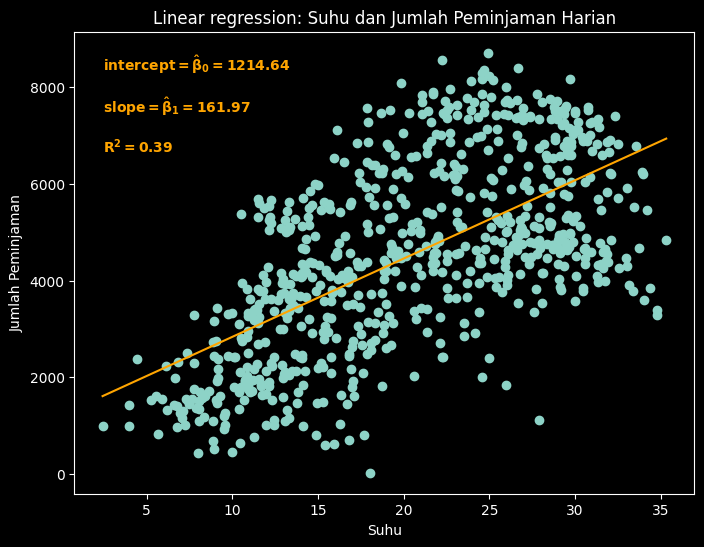

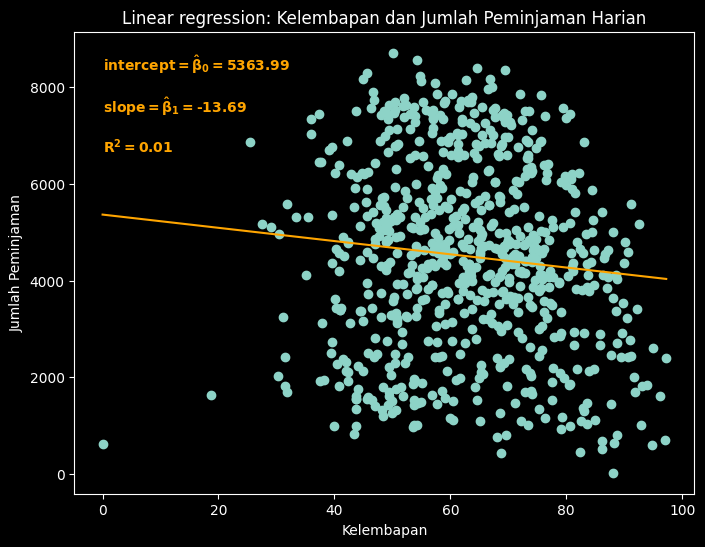

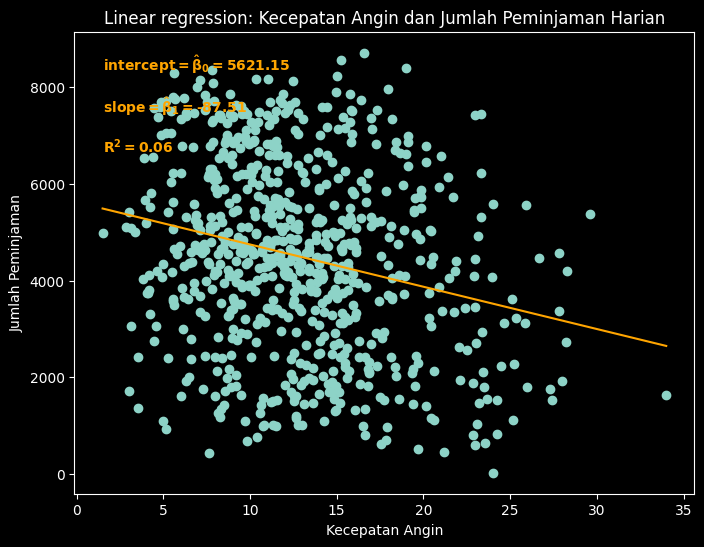

In [25]:
from sklearn.linear_model import LinearRegression

def lr_plot(df, varx = 'temp', xlab = 'Suhu'):
    x = df[varx].values.reshape((-1, 1))
    y = df['cnt'].values

    # Model
    model = LinearRegression()
    model.fit(x, y)

    r2 = model.score(x, y)
    coefficients = model.coef_
    intercept = model.intercept_

    # Plot
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(df[varx], df['cnt'])

    num = len(df)
    start = df[varx].min()
    end = df[varx].max()
    xseq = np.linspace(start, end, num=num)

    ax.plot(xseq, intercept + coefficients[0] * xseq, color="orange", lw=1.5)  # Ganti warna menjadi oranye

    beta0 = r'$\mathbf{intercept = \hat\beta_0 =}$' + str(round(intercept, 2))
    beta1 = r'$\mathbf{slope = \hat\beta_1 =}$' + str(round(coefficients[0], 2))
    r_squared = r'$\mathbf{R^2 =}$' + str(round(r2, 2))

    # Menambahkan teks
    ax.text(start, df['cnt'].max(), beta0, fontsize=10, color='orange', fontweight='bold', verticalalignment='top')
    ax.text(start, df['cnt'].max() - (df['cnt'].max() - df['cnt'].min()) / 10, beta1, fontsize=10, color='orange', fontweight='bold', verticalalignment='top')
    ax.text(start, df['cnt'].max() - (df['cnt'].max() - df['cnt'].min()) / 5, r_squared, fontsize=10, color='orange', fontweight='bold', verticalalignment='top')

    ax.set_title(f'Linear regression: {xlab} dan Jumlah Peminjaman Harian')
    ax.set_xlabel(xlab)
    ax.set_ylabel('Jumlah Peminjaman')

    # Show the plot
    plt.show()

lr_plot(df_day, varx = 'temp', xlab = 'Suhu')
lr_plot(df_day, varx = 'hum', xlab = "Kelembapan")
lr_plot(df_day, varx = 'windspeed', xlab = "Kecepatan Angin")

## Conclusion

- **Conclution pertanyaan 1**: Bagaimana tren jumlah pinjaman sepeda harian?<br>
Secara keseluruhan, terjadi peningkatan jumlah peminjaman sepeda dari tahun 2011 ke tahun 2012. Mayoritas peminjam merupakan pengguna terdaftar (registered), menunjukkan bahwa sebagian besar dari mereka adalah pengguna yang menggunakan layanan secara rutin. Puncak jumlah peminjaman sepeda cenderung terjadi pada bulan Oktober 2012, menandakan adanya tren peningkatan aktivitas peminjaman pada saat itu. Di sisi lain, jumlah peminjaman sepeda cenderung lebih rendah pada awal dan akhir tahun, mungkin dipengaruhi oleh faktor musiman atau kondisi cuaca yang kurang menguntungkan pada periode tersebut.

- Conclution pertanyaan 2: Bagaimana rata-rata peminjaman sepeda harian berdasarkan musimnya?<br>
Jumlah peminjaman sepeda harian tertinggi cenderung terjadi pada musim gugur, diikuti oleh musim panas dan musim dingin. Sedangkan musim semi cenderung lebih rendah dibandingkan periode musim lainnya.

- Conclusion Pertanyaan 3: Bagaimana rata-rata peminjaman sepeda berdasarkan waktu per-harinya?<br>
Jumlah peminjaman sepeda berdasarkan waktunya dalam 1 hari tertinggi cenderung terjadi pada saat evening, diikuti oleh afternoon dan morning. Sedangkan saat night cenderung lebih rendah dibandingkan waktu lainnya dalam 1 hari

- Conclusion Pertanyaan 4 (**Analisis Lanjutan**): Bagaimana Pengaruh cuaca terhadap jumlah pinjaman harian? <br>
Jumlah peminjaman sepeda harian memiliki hubungan cukup kuat yang positif dengan faktor suhu (temp). Sedangkan faktor kelembapan (hum) dan kecepatan angin (windspeed) memiliki hubungan yang lemah dengan jumlah peminjaman sepeda harian. Lebih lanjut, model regresi linear sederhana dapat menjadi gambaran awal untuk identifikasi pengaruh masing-masing faktor terhadap jumlah peminjaman sepeda harian, diperoleh bahwa faktor suhu menjadi faktor yang paling berpengaruh.